In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## The lognormal distribution of $S_t$

$$
\log S_t \,-\,\log S_0 = \log \frac{S_t}{S_0} =\left(\mu-\frac{1}{2}\sigma^2\right) t + \sigma W_t  \,. 
$$

Thus we can calculate the distribution of $\log \frac{S_t}{S_0}$ as
$$ \log \frac{S_t}{S_0} \sim  N\left(\left(\mu-\frac{1}{2}\sigma^2\right)t,\sigma^2 t\right)$$ 

or equivalently 

$$\log S_t \sim  N\left(\log S_0+\left(\mu-\frac{1}{2}\sigma^2\right)t,\sigma^2 t\right)$$

In [5]:
import scipy
logN = scipy.stats.lognorm(s=1, loc=0.05)

In [6]:
xmin = 0.05
xmax = 4
x = np.linspace(xmin,xmax,num = 1000)
y = logN.pdf(x)

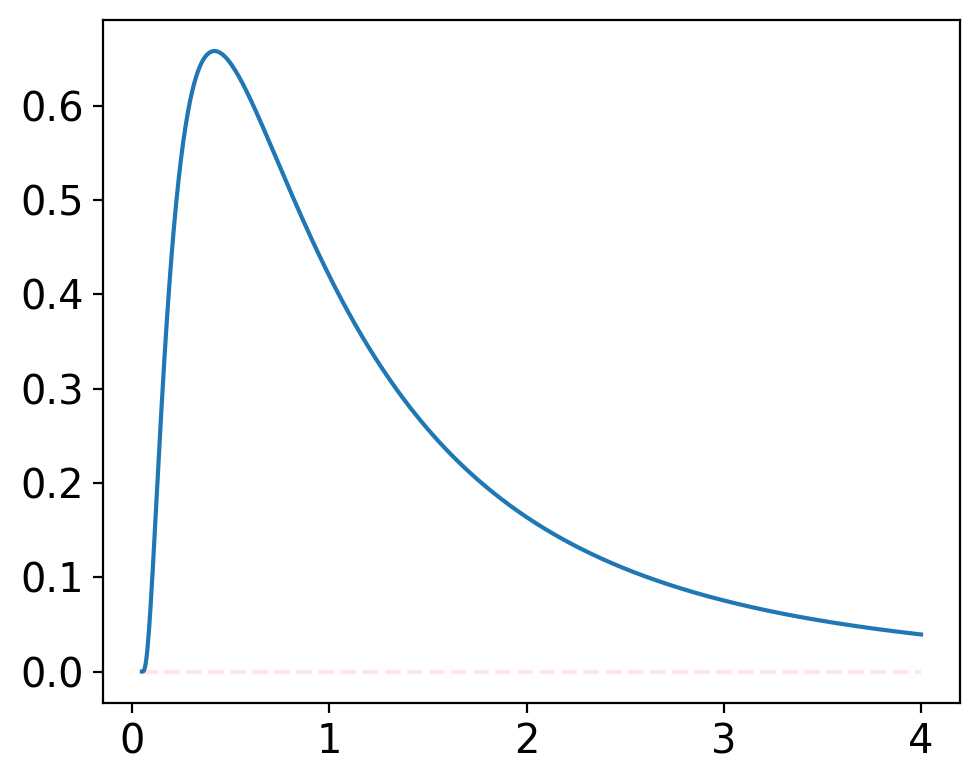

In [7]:
plt.figure(figsize=(5, 4))
plt.plot(x, y, linestyle = '-')
resolution_value = 50
plt.tight_layout()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'r', linestyles='--', alpha = 0.1)
plt.savefig('../figures/log_normal_pdf.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Interests rates

#### Assume the anual interest rate is 5%

In [8]:
import numpy as np

In [9]:
def get_cash_growth(initial_cash = 100, periods = 1, interest_rate_to_match = 0.05, end_time = 1):
    times = np.linspace(start = 0, stop = end_time, num = int(end_time*(periods)) + 1)
    interest_rate = (np.exp(np.log(1.+interest_rate_to_match)/periods)-1.) * periods
    effective_interest_rate = interest_rate / periods
    cash_aux = initial_cash
    cash = np.zeros_like(times)
    for it, t in enumerate(times):
        cash[it] = cash_aux
        cash_aux = cash_aux * (1+effective_interest_rate)
    return times, cash, effective_interest_rate

In [10]:
R = 0.05
initial_cash = 100
r_exp = np.log(1+R)

## Interesting limit

In [11]:
nmin = 1
nmax = 100
n = np.arange(nmin, nmax, 1)
r_n = n*( (1.+R)**(1./n) - 1)

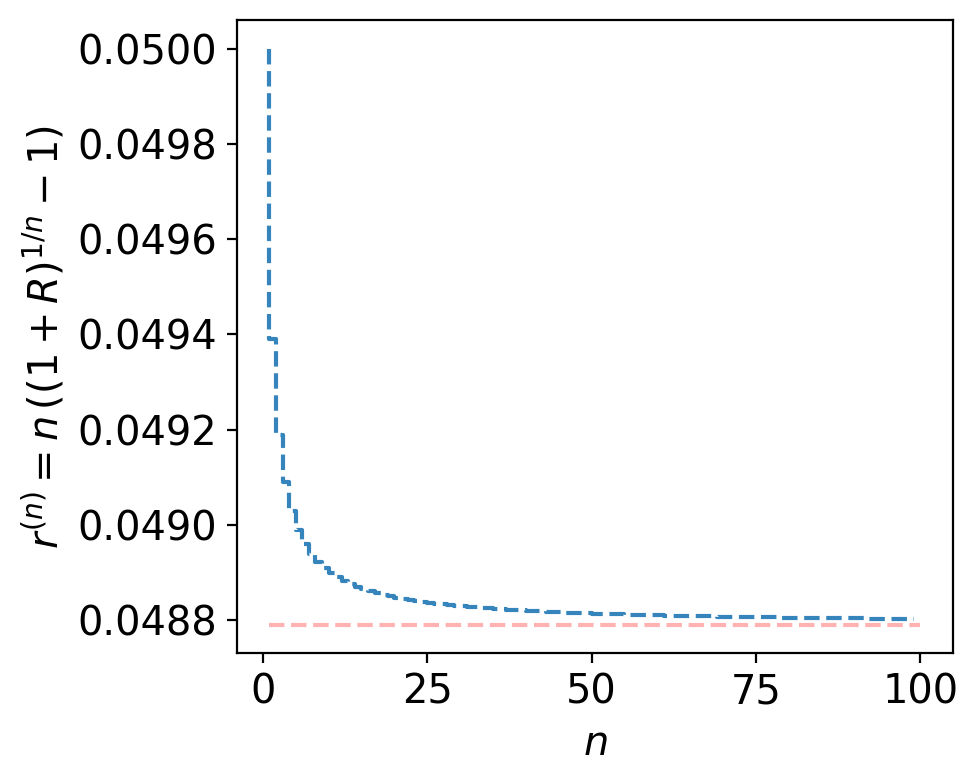

In [12]:
plt.figure(figsize=(5, 4))
plt.step(n, r_n, linestyle = '--', alpha = 0.9)
plt.hlines(y = np.log(1+R), xmin = nmin, xmax=nmax, colors='red', linestyle = '--', alpha = 0.3)
resolution_value = 50
plt.xlabel('$n$')
plt.ylabel('$r^{(n)} =  n\,( (1+R)^{1/n}  -1)$')
plt.tight_layout()
plt.savefig('../figures/limit_interest_rate.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [13]:
n1 = 2
n2 = 10
n3 = 20
n4 = 100

T = 1
time1, cash1, _ = get_cash_growth(initial_cash = initial_cash, periods = n1, interest_rate_to_match = R, end_time = T)
time2, cash2, _ = get_cash_growth(initial_cash = initial_cash, periods = n2, interest_rate_to_match = R, end_time = T)
time3, cash3, _ = get_cash_growth(initial_cash = initial_cash, periods = n3, interest_rate_to_match = R, end_time = T)
time4, cash4, _ = get_cash_growth(initial_cash = initial_cash, periods = n4, interest_rate_to_match = R, end_time = T)

time_exp = np.linspace(0,T,1_000)
cash_exp = initial_cash*np.exp(r_exp*time_exp)

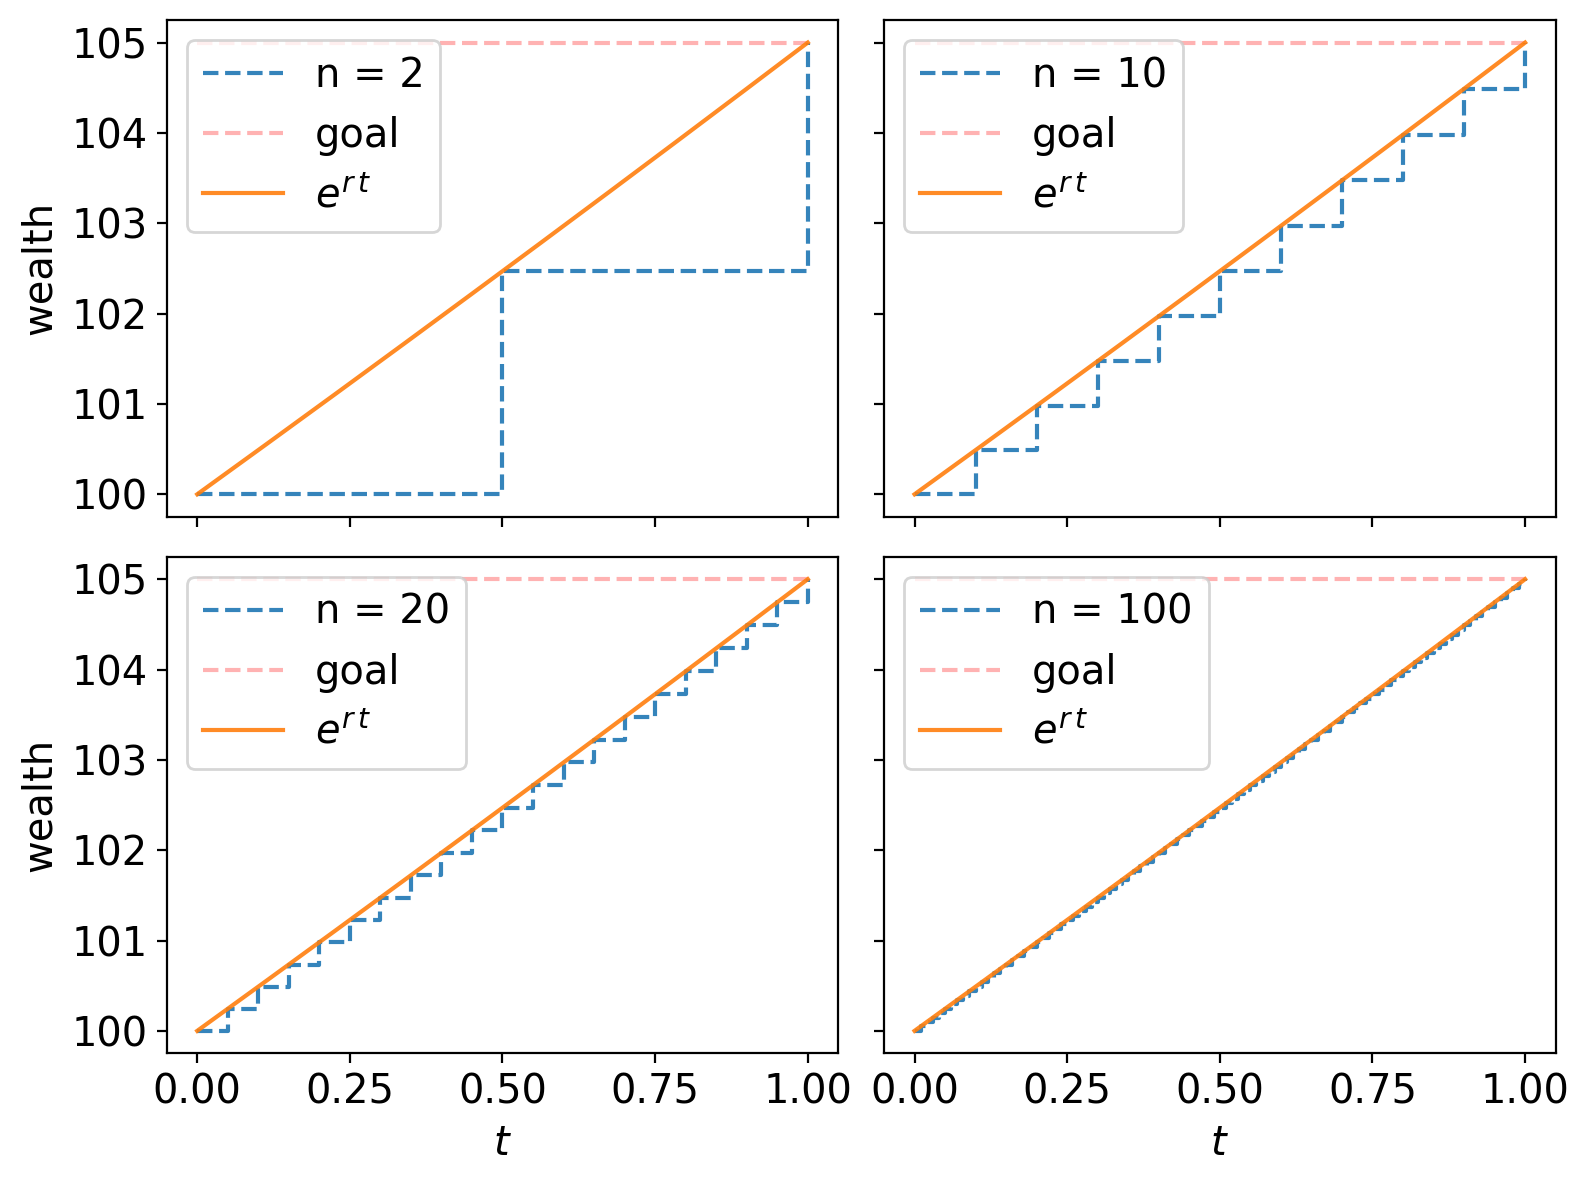

In [14]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))
fig.tight_layout(pad=3)

ax[0,0].step(time1, cash1, where='post', linestyle = '--', alpha = 0.9)
ax[0,0].hlines(y = initial_cash*(1+R), xmin = 0, xmax=T, colors='red', linestyle = '--', alpha = 0.3)
ax[0,0].plot(time_exp, cash_exp, linestyle = '-', alpha = 0.9)
ax[0,0].legend([f'n = {n1}','goal','$e^{r\,t}$'])

ax[0,1].step(time2, cash2, where='post', linestyle = '--', alpha = 0.9)
ax[0,1].hlines(y = initial_cash*(1+R), xmin = 0, xmax=T, colors='red', linestyle = '--', alpha = 0.3)
ax[0,1].plot(time_exp, cash_exp, linestyle = '-', alpha = 0.9)
ax[0,1].legend([f'n = {n2}','goal','$e^{r\,t}$'])

ax[1,0].step(time3, cash3, where='post', linestyle = '--', alpha = 0.9)
ax[1,0].hlines(y = initial_cash*(1+R), xmin = 0, xmax=T, colors='red', linestyle = '--', alpha = 0.3)
ax[1,0].plot(time_exp, cash_exp, linestyle = '-', alpha = 0.9)
ax[1,0].legend([f'n = {n3}','goal','$e^{r\,t}$'])

ax[1,1].step(time4, cash4, where='post', linestyle = '--', alpha = 0.9)
ax[1,1].hlines(y = initial_cash*(1+R), xmin = 0, xmax=T, colors='red', linestyle = '--', alpha = 0.3)
ax[1,1].plot(time_exp, cash_exp, linestyle = '-', alpha = 0.9)
ax[1,1].legend([f'n = {n4}','goal','$e^{r\,t}$'])

resolution_value = 50
ax[1,0].set_xlabel('$t$')
ax[1,1].set_xlabel('$t$')

ax[0,0].set_ylabel('wealth')
ax[1,0].set_ylabel('wealth')

plt.tight_layout()
plt.savefig('../figures/interest_rates_01.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [35]:
T = 20
timeT, cashT, _ = get_cash_growth(initial_cash = initial_cash, periods = n1, interest_rate_to_match = R, end_time = T)
time_exp = np.linspace(0,T,1_000)
cash_exp = initial_cash*np.exp(r_exp*time_exp)

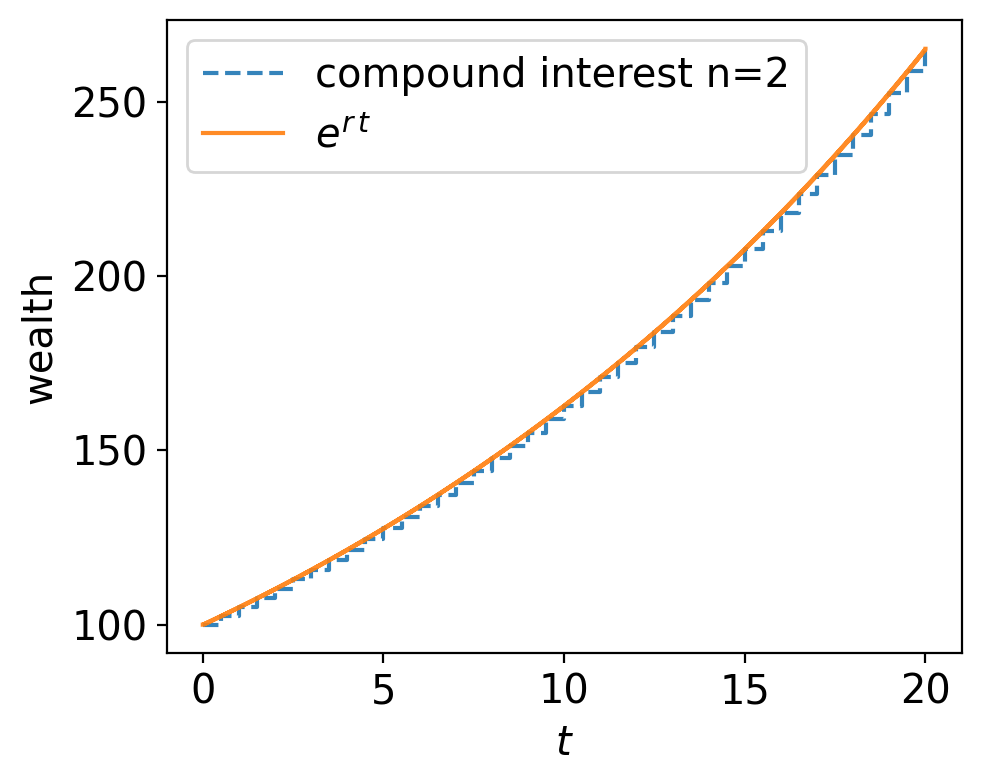

In [36]:
plt.figure(figsize=(5, 4))
plt.step(timeT, cashT, where='post', linestyle = '--', alpha = 0.9)
plt.step(time_exp, cash_exp, where='post', linestyle = '-', alpha = 0.9)
resolution_value = 50
plt.legend([f'compound interest n={n1}', '$e^{r\,t}$'])
plt.xlabel('$t$')
plt.ylabel('wealth')
plt.tight_layout()
plt.savefig('../figures/interest_rates_010.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Call option payoff function

In [17]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

In [18]:
K = 100
S = np.linspace(start = 80,stop = 120, num = 1000)
payoff = call_option_payoff(K = K, S = S)

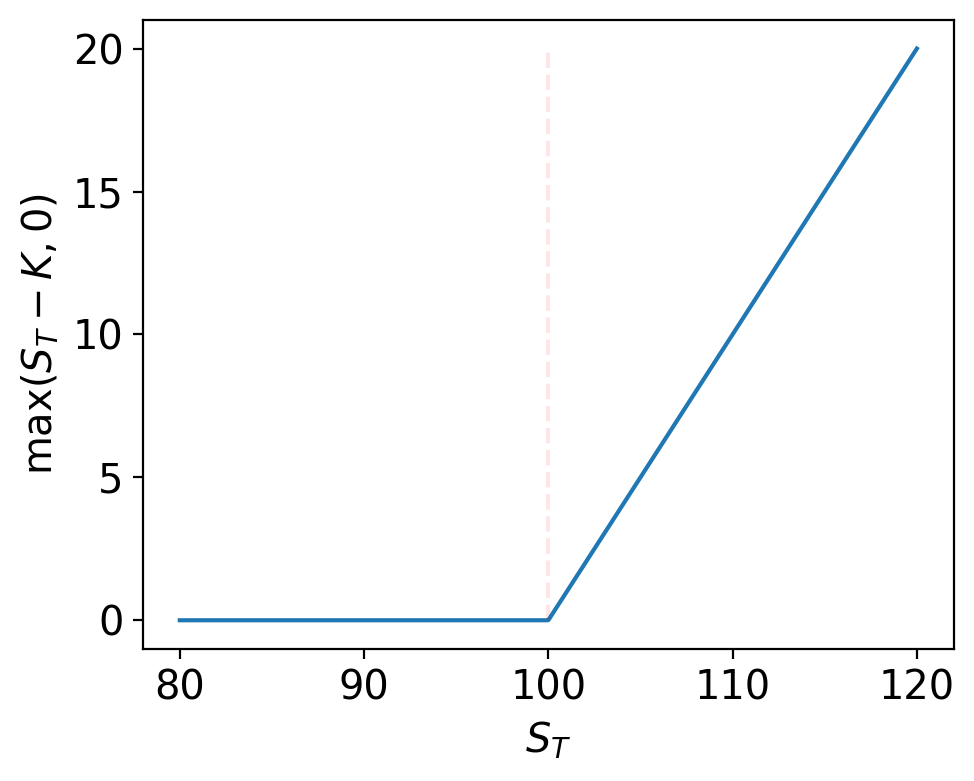

In [19]:
plt.figure(figsize=(5, 4))
plt.plot(S, payoff, linestyle = '-')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.xlabel('$S_T$')
plt.ylabel('max$(S_T-K,0)$')
plt.tight_layout()
plt.savefig('../figures/payoff_call.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Pricing of a European Call option

In [20]:
S = 1
K = 1.1
sigma = 0.1

t = 0
T = 1

r = 0.05

In [21]:
def d1_BS(S,K,r,sigma,t,T):
    return (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))

def d2_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    return d1 - sigma* np.sqrt(T-t)

def computeBlackScholesCallPrice(t,T,S,r,sigma,K):
    d1 = d1_BS(S,K,r,sigma,t,T)
    d2 = d2_BS(S,K,r,sigma,t,T)
    Nd1 = stat.norm.cdf(d1)
    Nd2 = stat.norm.cdf(d2)
    return S*Nd1 - K*np.exp(-r*(T-t))*Nd2

In [22]:
d1_BS(S,K,r,sigma,t,T)

-0.40310179804324886

In [23]:
d2_BS(S,K,r,sigma,t,T)

-0.5031017980432488

In [24]:
computeBlackScholesCallPrice(t,T,S,r,sigma,K)

0.02173945155462853

In [25]:
def Delta_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    Nd1 = stat.norm.cdf(d1)
    return Nd1

In [26]:
Delta_Call_BS(S,K,r,sigma,t,T)

0.343436668962647

In [27]:
def Gamma_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    nd1 = stat.norm.pdf(d1)
    return nd1/(S*sigma*np.sqrt(T-t))

In [28]:
Gamma_Call_BS(S,K,r,sigma,t,T)

3.678117344101192

In [29]:
def Vega_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    nd1 = stat.norm.pdf(d1)
    return nd1*S*np.sqrt(T-t)

In [30]:
Vega_Call_BS(S,K,r,sigma,t,T)

0.3678117344101192